# KLASIFIKASI TWEET

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import torch 
import re
import torch
import sklearn
import seaborn as sns


#DATA UNDERSTANDING
file = "/kaggle/input/tweet-emosi/Twitter_Emotion_Dataset.csv"
dataku = pd.read_csv(file)
dataku.head(10)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
5,anger,"Dari sekian banyak thread yang aku baca, threa..."
6,happy,Sharing sama temen tuh emg guna bgt. Disaat lu...
7,sadness,Orang lain kalau pake ponco itu buat jas hujan...
8,anger,"Contoh mereka yg gemar menyudutkan, teriak pal..."
9,sadness,Pulang udah H-4 lebaran dilema sekali. Seperti...


In [57]:
target = dataku['label']

In [58]:
#LIAT BEBERAPA TWEET
for i in range(10):
    print(dataku['tweet'][i])
    print("\n")

Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]


Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. Gimana orang asing? Wajarlah banyak korban yang takut curhat, bukan dibela malah dihujat.


Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah.


Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,agr bermnfaat semua pihak.Mohon yg punya otak,berpikirlah dgn wajar,kecuali otaknya butek.Ya kamu. [URL]


Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress semua! Mungkin bisa dicoba twi

In [59]:
print(dataku.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB
None


In [60]:
print(dataku.shape)

(4401, 2)


1. datanya terdiri dr 2 kolom/ atribut yaitu atribut label n tweet
2. jumlah datanya ad 4401 (g terlalu banya jd prone to underfit)
3. semua data bertipe object, tar harus diubah jadi bentuk angka semua

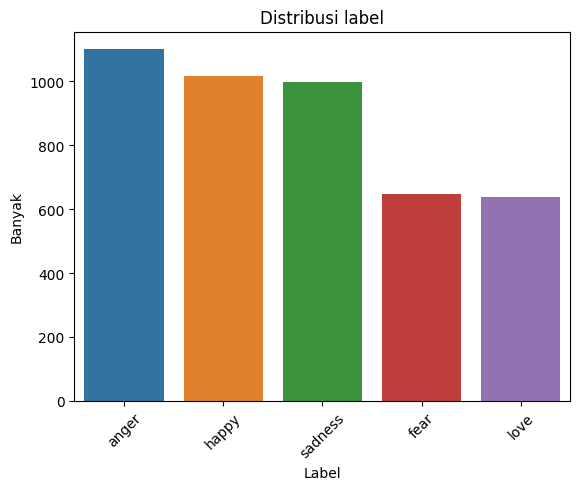

In [61]:
label = dataku['label'].value_counts() # label paling banya anger
sns.barplot(x = label.index, y = label.values)
plt.xticks(rotation=45)  # You can try 90, 30, or 60 as well

plt.xlabel("Label")
plt.ylabel("Banyak")
plt.title("Distribusi label")
plt.show()

yang help help ini skip aj gawsa diperhatiin

In [62]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

In [63]:
from sklearn.naive_bayes import GaussianNB
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(_BaseNB)
 |  GaussianNB(*, priors=None, var_smoothing=1e-09)
 |  
 |  Gaussian Naive Bayes (GaussianNB).
 |  
 |  Can perform online updates to model parameters via :meth:`partial_fit`.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like of shape (n_classes,), default=None
 |      Prior probabilities of the classes. If specified, the priors are not
 |      adjusted according to the data.
 |  
 |  var_smoothing : float, default=1e-9
 |      Portion of the largest variance of all features that is added to
 |      variances for calculation stability.
 |  
 |      .. versionadded:: 0.20
 |  
 |  Attributes
 |  

In [64]:
from sklearn.naive_bayes import MultinomialNB
help(MultinomialNB)

Help on class MultinomialNB in module sklearn.naive_bayes:

class MultinomialNB(_BaseDiscreteNB)
 |  MultinomialNB(*, alpha=1.0, force_alpha='warn', fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multinomial models.
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.
 |  
 |  Read more in the :ref:`User Guide <multinomial_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float or array-like of shape (n_features,), default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (set alpha=0 and force_alpha=True, for no smoothing).
 |  
 |  force_alpha : bool, default=False
 |      If False and alpha is less than 1e-10, it will set alpha to
 |      1e-10. If True, alpha will remain unchanged. This 

In [65]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


# PRE PROCESSING DATA

In [66]:
#DATA TRASNFORMATION N CLEANING

from sklearn.pipeline import Pipeline
#Encoding label
from sklearn.preprocessing import LabelEncoder, FunctionTransformer

label_encoder = LabelEncoder() #label diubah jd angka dlu
label_encoded = label_encoder.fit_transform(dataku['label'])



#tokenisasi data (ngubah data teks jd angka)
from sklearn.feature_extraction.text import TfidfVectorizer

#stopword removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

remover = StopWordRemoverFactory()
kata_stop = remover.get_stop_words()

#stemming data
def bersihkan_data(teks_series):
    return teks_series.apply(lambda teks: 
                        re.sub(r'\[.*?\]', '', 
                        re.sub(r'http\S+', '', 
                        re.sub(r'\d+', '', 
                        re.sub(r'[^a-zA-Z\s]', '', 
                        teks.lower().strip()
                        )))))
    
#pipeline transfromasi data teks biar cohesive
Pipeline_text = Pipeline([
    ('cleaning', FunctionTransformer(bersihkan_data, validate=False)),  # cleaning data
    ('vectorizing', TfidfVectorizer(stop_words=kata_stop)), # vektorisasi
])

dataku_transformed =Pipeline_text.fit_transform(dataku['tweet'])



In [67]:
dataku_transformed.shape

(4401, 19272)

In [68]:
#MODEL YANG DIPAKAI
from sklearn.naive_bayes import MultinomialNB
modelku = MultinomialNB()

IMPLEMENTASI NAIVE BAYES CUSTOM

In [69]:
import math
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score

# Custom Naive Bayes Classifier
class CustomNaiveBayes:
    def __init__(self): #constructor 
        
        self.class_priors = {} #nyimpen prior probability tiap class
        self.word_probs = {} #nyimpen probab tiap terhadap kelas p(kata|class)
        self.vocab_size = 0 #nomor kata unik
        self.class_word_totals = {} #total banyak kata tersebut muncul di tiap kelas
        self.class_word_counts = {} #frekuensi vektor per kelas

    def fit(self, X, y): #method untuk mengolah data train
        X = X.toarray() #ngubah sparse matriks dense matriks
        n_docs, n_features = X.shape #banyak tweet dan banyak kata unik
        self.vocab_size = n_features

        class_docs = defaultdict(list)
        for i in range(len(y)):#menggrubkan tweet berdasarkan label
            label = y.iloc[i] if hasattr(y, "iloc") else y[i]
            class_docs[label].append(X[i])

        self.class_priors = {c: len(docs) / n_docs for c, docs in class_docs.items()}#itung prior probabilitas

        for c, docs in class_docs.items():
            docs_array = np.array(docs)
            word_totals = docs_array.sum(axis=0)  # total frekuensi tiap kata dalam dokumen
            self.class_word_totals[c] = word_totals.sum()
            self.class_word_counts[c] = word_totals
            self.word_probs[c] = (word_totals + 1) / (self.class_word_totals[c] + self.vocab_size)  # Laplace smoothing

    def predict(self, X): #method untuk prediksi data
        X = X.toarray()
        preds = []

        for doc in X:
            class_scores = {}
            for c in self.class_priors:
                log_prob = math.log(self.class_priors[c])
                log_prob += np.sum(doc * np.log(self.word_probs[c]))
                class_scores[c] = log_prob
            preds.append(max(class_scores, key=class_scores.get))
        return preds


# KLASIFIKASI BINER TWEETNYA ANGER OR NOT

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Re-create target as binary: is the tweet "anger" or not
dataku_binary = (dataku['label'] == 'anger').astype(int)

# Split binary labels for classification
x_train_full_bin, x_test_bin, y_train_full_bin, y_test_bin = train_test_split(
    dataku_transformed, dataku_binary, test_size=0.2, random_state=42)

# Model and param grid (for MultinomialNB, 'alpha' is a tunable hyperparameter)
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}


# Use GridSearchCV to find the best alpha
grid_search = GridSearchCV(modelku, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(x_train_full_bin, y_train_full_bin)

# Best model after tuning
best_model = grid_search.best_estimator_

# Evaluate on test data
predictions = best_model.predict(x_test_bin)
print("Best alpha:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test_bin, predictions))
print("Classification Report:\n", classification_report(y_test_bin, predictions))

# Predict anger for a specific tweet (example: index 0)
tweet_vector = dataku_transformed[0]
prediction = best_model.predict(tweet_vector)
print("Is the Tweet angry?", bool(prediction[0]))


Best alpha: {'alpha': 0.1}
Test Accuracy: 0.8376844494892168
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       652
           1       0.73      0.59      0.66       229

    accuracy                           0.84       881
   macro avg       0.80      0.76      0.77       881
weighted avg       0.83      0.84      0.83       881

Is the Tweet angry? True


In [71]:
#perfomance measures pake cross validation

from sklearn.model_selection import cross_val_score
cvs = cross_val_score(modelku, x_train_full_bin, y_train_full_bin, cv=3, scoring='accuracy')

print(cvs)

#Confusion matriks
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(modelku, x_train_full_bin, y_train_full_bin, cv=3) #set of prediksi buat di compare sm value yang asli
#cross_val_predict ngembaliin prediksi pada setiap fold
cm = confusion_matrix(y_train_full_bin, y_train_pred)
cm

[0.75553663 0.75362319 0.75362319]


array([[2648,    0],
       [ 865,    7]])

In [35]:
#SPLIT DATA untuk multiclass classification
from sklearn.model_selection import train_test_split

x_train_full,x_test,y_train_full,y_test = train_test_split(dataku_transformed,label_encoded,test_size=0.2, random_state=42)
#data validasi
x_train,x_val,y_train,y_val = train_test_split(x_train_full,y_train_full,test_size=0.2, random_state=42)

# KLASIFIKASI 3 KELAS TERATAS

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Drop rows where the label is 'fear' or 'love'
dataku_new = dataku[~dataku['label'].isin(['fear', 'love'])]

# Reset index
dataku_3 = dataku_new.reset_index(drop=True)

# Split features and labels
X = dataku_3['tweet']
y = dataku_3['label']

# Preprocess features
X_transformed = Pipeline_text.fit_transform(X)

# Train-test split
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# === Option A: Use MultinomialNB (sklearn) ===
modelku.fit(x_train_3, y_train_3)
prediksi2 = modelku.predict(x_test_3)

# === Option B: Use your Custom Naive Bayes ===
# my_model = CustomNaiveBayes()
# my_model.fit(x_train_3, y_train_3)
# prediksi2 = my_model.predict(x_test_3)

# Accuracy
print("Validation Accuracy:", accuracy_score(y_test_3, prediksi2))


Validation Accuracy: 0.6918138041733547


In [74]:
#MODELING DATA

modelku.fit(x_train,y_train)

MultinomialNB()

In [75]:
my_model=CustomNaiveBayes()
my_model.fit(x_train,y_train)

predictions = my_model.predict(x_val)

from sklearn.metrics import accuracy_score
print("Validation Accuracy:", accuracy_score(y_val, predictions))

Validation Accuracy: 0.5610795454545454


In [76]:
from sklearn.model_selection import cross_val_score

skor = cross_val_score(modelku, dataku_transformed, label_encoded, cv=5, scoring='accuracy')

print("skor :", skor)
print("rata-rata akurasi", skor.mean())

skor : [0.52667423 0.57045455 0.57386364 0.54886364 0.52386364]
rata-rata akurasi 0.5487439376741305


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.93      0.67       229
           1       1.00      0.26      0.41       119
           2       0.70      0.61      0.65       214
           3       0.95      0.35      0.52       119
           4       0.48      0.53      0.50       200

    accuracy                           0.59       881
   macro avg       0.73      0.53      0.55       881
weighted avg       0.68      0.59      0.57       881



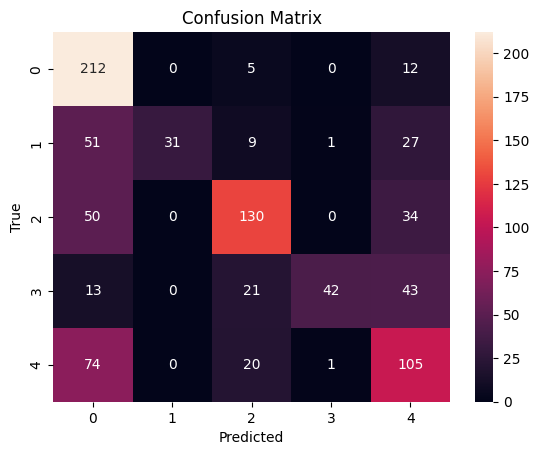

In [77]:
#EVALUASI MODEL
from sklearn.metrics import classification_report, confusion_matrix

y_pred = my_model.predict(x_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

1. dari confusion matriks diatas dilihat bahwa masih banya data yang salah diklasifikasikan
2. model

In [89]:
from sklearn.metrics import f1_score

# --- Binary classification (e.g. anger vs not anger)
y_pred_bin = my_model.predict(x_test_bin)
skor_bin = f1_score(y_test_bin, y_pred_bin, average='micro')
print("F1 Score (Binary):", skor_bin)



# --- Multiclass classification (all labels)
y_pred_multi = my_model.predict(x_val)  # assuming x_val is for full multi-class
skor_multi = f1_score(y_val, y_pred_multi, average='macro')  # or 'macro'
print("F1 Score (Multiclass):", skor_multi)


F1 Score (Binary): 0.21339387060158907
F1 Score (Multiclass): 0.5333484849816534
